In [3]:
import h5py
import librosa

file = h5py.File('dataset.h5', 'r')
#label_dict = {"['n']": 0, "['c']": 1, "['h']": 2, "['s']": 3,
 #             "['a']": 4, "['f']": 5, "['d']": 6, "['su']": 7}
#label_dict = {"[b'n']": 0, "[b'c']": 1, "[b'h']": 2, "[b'sa']": 3,
              #"[b'a']": 4, "[b'f']": 5, "[b'd']": 6, "[b'su']": 7}

In [4]:
X, y = file['mfcc'][:36406], file['label'][:36406]

mfcc_delta = librosa.feature.delta(X)
mfcc_delta2 = librosa.feature.delta(X, order = 2)

#X_test, y_test = file['mfcc'][], file['label'][]
file['mfcc'].shape

(36406, 12, 42)

In [7]:
X_deltas = np.concatenate((X,mfcc_delta, mfcc_delta2), axis = 1)

In [8]:
X_deltas.shape

(36406, 36, 42)

In [9]:
y.shape

(36406, 1)

In [10]:
import sys
import numba 
import numpy
from numba import cuda
import numpy as np

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_deltas, y, test_size=0.33, random_state=42)

array([4], dtype=int64)

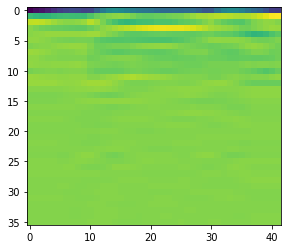

In [13]:
plt.imshow(X_train[6])
y_train[6]

In [15]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

model = Sequential()

model.add(tf.keras.layers.Reshape((36, 42, 1), input_shape=(36,42)))
model.add(Conv2D(128, (6,6),padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3),padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
#model.add(Dense(8, activation='softmax'))

#model = Sequential()
#model.add(tf.keras.layers.Reshape((12, 42, 1), input_shape=(12,42)))
#model.add(Conv2D(128, 5,padding='same',
                 #input_shape=(12,42)))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(MaxPooling2D(pool_size=(8)))
#model.add(Conv2D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(Flatten())
#model.add(Dense(8))
#model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=None, decay=0.0)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 36, 42, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 36, 42, 128)       4736      
                                                                 
 activation_6 (Activation)   (None, 36, 42, 128)       0         
                                                                 
 dropout_8 (Dropout)         (None, 36, 42, 128)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 18, 21, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 21, 128)       147584    
                                                      

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [20]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
cnnhistory=model.fit(X_train, y_train, batch_size=512, epochs=100,validation_data=(X_test, y_test),callbacks=[es], verbose=1)


Epoch 1/100
48/48 [==============================] - 195s 4s/step - loss: 5.5752 - accuracy: 0.1452 - val_loss: 2.8329 - val_accuracy: 0.1385
Epoch 2/100
17/48 [=========>....................] - ETA: 1:53 - loss: 5.5900 - accuracy: 0.1453

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

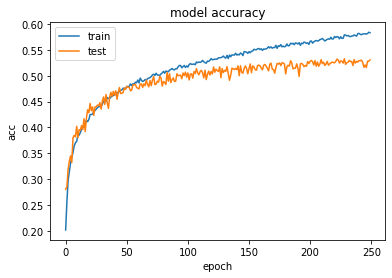

In [79]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()